Esse projeto tem como objetivo analisar o comportamento dos tipos de clientes, member e casual, no período de todo o ano de 2021. O projeto abrangeu todo o processo de análise de dados, desde o entendimento do problema até o compartilhamento dos achados da análise. Como ferramenta utilizada escolhi python, pois acho melhor para trabalhar com conjuntos maiores. A seguir algumas informações sobre o projeto:

### Colunas do Dataset

> **ride_id:** ID da Bicicleta   
> **rideable_type:** Tipo da bicicleta   
> **started_at:** Data e tempo de início utilização  
> **ended_at:** Data e tempo de fim de utilização   
> **start_station_name:** Nome da estação de início   
> **start_station_id:** ID da estação de início   
> **end_station_name** Nome da estação de fim   
> **end_station_id:** ID da estação de fim   
> **start_lat:** Latitude de início   
> **start_lng:** Longitude de início   
> **end_lat:** Latitude de fim   
> **end_lng:** Longitude de fim    
> **member_casual:** Tipo de cliente   
### Objetivo principal:

Analisar os padrões de uso dos clientes de uma empresa de compartilhamneto de bicicletas e converter os clientes do tipo casual em member

### O que a análise buscará responder:

        - Quais os tipos de bicicleta são os preferidos por tipo de cliente;
        - Quais partes do dia são as preferidas por tipo de cliente;
        - Quais dias da semana são os preferidos por tipo de cliente;
        - Quais períodos do ano são os preferidos por tipo de cliente;
        - Quais estações são as preferidas por tipo de cliente;
        - Qual o tempo médio de uso por tipo de cliente.

### O que se esperar com essa análise:

Espera-se que os  stakeholders tomem medidas com base na análise para resolver o problema de conversão de clientes do tipo casual no tipo member. Por meio da análise os interessados poderão observar as principais diferenças no padrão de uso de seus clientes e escolher a melhor estratégia de negócio para alcançar seus objetivos.

Fonte dos dados: <https://www.kaggle.com/datasets/yuliuschandragunawan/divvy-chicago-bikesharing-data>

## Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Carregando os dados e olhando o DataFrame

In [2]:
path = 'data/'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
df.shape

(3489748, 13)

In [4]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


## Preparando os dados para a análise

#### Drop de colunas desnecessárias para a análise

##### Motivos:
    
    -1 A análise será de indentificar padrões de dois grupos, por isso não é nescessário essas colunas de ID
    -2 O conjunto de dados já traz informações que permitem indentificar as estações

In [6]:
df.drop(['ride_id', 'start_station_id', 'end_station_id'], axis=1, inplace=True)

#### Tratamento de dados ausentes

In [7]:
# Vamos olhar as colunas com dados ausentes
df.isnull().any()

rideable_type         False
started_at            False
ended_at              False
start_station_name     True
end_station_name       True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

##### O DataFrame tem 4 colunas que apresentam algum dado ausente, por isso vou criar uma função que mensure a dimensão que esse problema tem

In [8]:
def missingData(df):
  missing_df = round(df.isnull().sum().sum() / np.product(df.shape) * 100, 2)
  print(f'O DataFrame tem {missing_df}% de dados ausentes')
  print('\n')
  for col in df.columns:
    missing_col = round(df[col].isnull().mean() * 100, 2)
    if missing_col != 0:
      print(f'A coluna {col} tem {missing_col}% de dados ausentes')

In [9]:
missingData(df)

O DataFrame tem 0.79% de dados ausentes


A coluna start_station_name tem 3.5% de dados ausentes
A coluna end_station_name tem 4.1% de dados ausentes
A coluna end_lat tem 0.14% de dados ausentes
A coluna end_lng tem 0.14% de dados ausentes


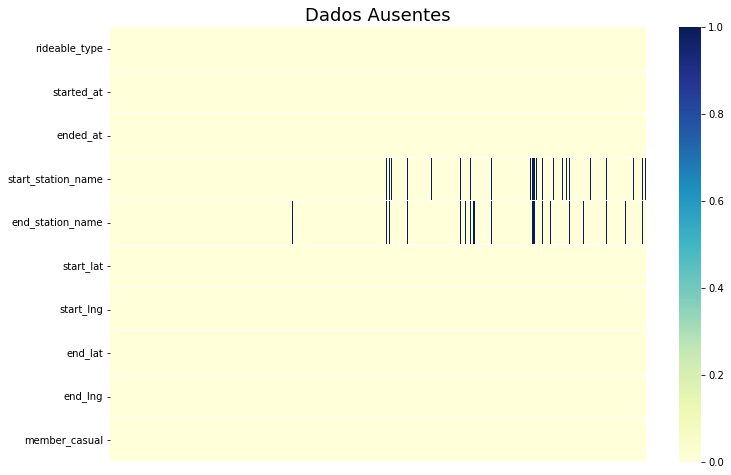

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=df.isnull().transpose(), cmap="YlGnBu")
plt.title('Dados Ausentes', fontdict={'fontsize':18})
plt.gca().axes.get_xaxis().set_visible(False);

Como apenas 0.79% dos dados são ausentes escolhi fazer o drop de linhas

In [11]:
df.dropna(axis=0, inplace=True)

In [12]:
# Vamos ver se ainda temos dados ausentes
missingData(df)

O DataFrame tem 0.0% de dados ausentes




#### Com o objetivo de trabalhar com data e tempo farei uma transformação nos tipos de dados das colunas de tempo e depois criarei uma coluna com a duração de utilização do serviço em minutos, uma coluna de dia e mês

In [13]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [14]:
# Olhando os tipos de dados
df.dtypes

rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
end_station_name              object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [15]:
df['dur_min'] = round(pd.Series(df.ended_at - df.started_at).dt.total_seconds()/60, 2)

In [16]:
df['day'] = df['started_at'].dt.strftime('%A')
df['month'] = df['started_at'].dt.month_name()

In [17]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,dur_min,day,month
0,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,41.8964,-87.6610,41.9322,-87.6586,member,26.82,Sunday,April
1,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,41.9244,-87.7154,41.9306,-87.7238,member,8.15,Friday,April
2,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,41.8945,-87.6179,41.8679,-87.6230,member,14.38,Wednesday,April
3,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,41.9030,-87.6975,41.8992,-87.6722,member,12.20,Tuesday,April
4,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,41.8902,-87.6262,41.9695,-87.6547,casual,52.92,Saturday,April


In [18]:
# Vou ver as estatísticas descritivas da nova coluna do DataFrame
df['dur_min'].describe()

count    3.295563e+06
mean     2.522048e+01
std      3.810440e+02
min     -2.904997e+04
25%      8.030000e+00
50%      1.470000e+01
75%      2.687000e+01
max      5.872003e+04
Name: dur_min, dtype: float64

Indentifiquei valores incorretos para o tipo de coluna, já que o tempo de utilização da bicicletas não podem ser negativos ou valor zero

In [19]:
print(f'Observações com dados negativos ou zerados: {df[df["dur_min"] <= 0].shape[0]} de um total de {df.shape[0]} linhas')

Observações com dados negativos ou zerados: 10743 de um total de 3295563 linhas


Como apenas 652 obervações estão com esse problema farei o drop delas

In [20]:
Rows = df[df['dur_min'] <= 0].index
df = df.drop(Rows, axis=0)

In [21]:
df['dur_min'].describe()

count    3.284820e+06
mean     2.804870e+01
std      2.590114e+02
min      2.000000e-02
25%      8.080000e+00
50%      1.475000e+01
75%      2.692000e+01
max      5.872003e+04
Name: dur_min, dtype: float64

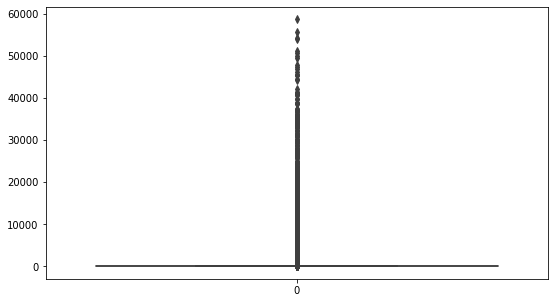

In [22]:
# Vou olhar a distribuição dessa coluna
plt.figure(figsize=(9, 5))
sns.boxplot(data=df['dur_min']);

Tratarei esses outliers, tendo em vista que valores extremos distorcem a indentificação de padrões 

In [23]:
q1, q3 = df['dur_min'].quantile(0.25), df['dur_min'].quantile(0.75)
iqr = q3 - q1
cut_of = iqr * 1.5
lower = q1 - cut_of
upper = q3 + cut_of
df['dur_min'] = np.where(df['dur_min'] < lower, np.nan, df['dur_min'])
df['dur_min'] = np.where(df['dur_min'] > upper, np.nan, df['dur_min'])
df['dur_min'].fillna(method='ffill', inplace=True)

Usei o método 'ffill' para não modificar muito a distribuição dos dados

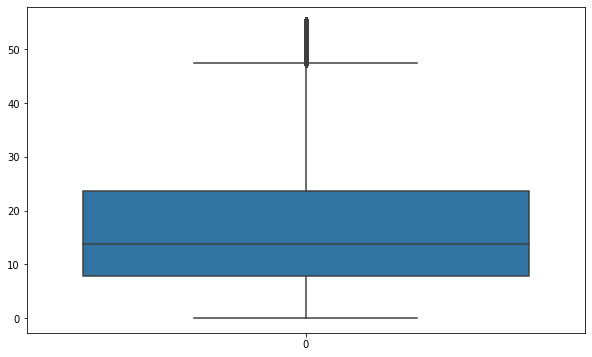

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df['dur_min']);

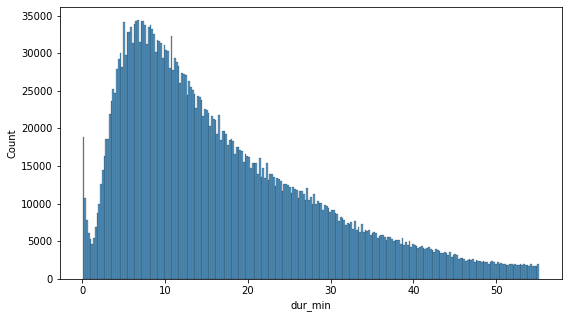

In [25]:
plt.figure(figsize=(9, 5))
sns.histplot(df['dur_min']);

## Análise

### 1 - Uso do serviço por tipo de cliente

In [26]:
df['member_casual'].value_counts()

member    1936444
casual    1348376
Name: member_casual, dtype: int64

#### Observações:

Mesmo que a base de dados não permita identificar quantos clientes de cada tipo usaram o serviço, é possível ver que de forma geral a maior parte do uso foi por clientes tipo member

### 2 - Distribuição de tempo em minutos por tipo de cliente e média de cada de tipo

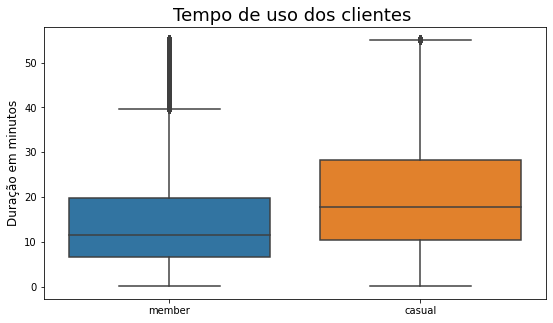

In [27]:
# Distribuição
fig, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(x='member_casual', y='dur_min', data=df, ax=ax)
plt.title('Tempo de uso dos clientes ', fontdict={'fontsize':18})
plt.xlabel('')
plt.ylabel('Duração em minutos', fontdict={'fontsize':12});

In [28]:
df.groupby('member_casual')['dur_min'].mean().to_frame('média em minutos')

,média em minutos
member_casual,
casual,20.530027
member,14.475600


#### Observações:

    - Os clientes do tipo casual têm média e distribuição maiores quando comparados com os do tipo member

### 3 - Tipos de bicicletas preferidos por tipo de cliente

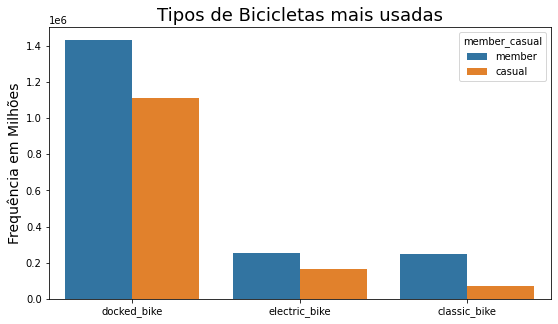

In [29]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.countplot(x = 'rideable_type', hue = 'member_casual', data = df)
ax.set_xlabel('')
ax.set_ylabel('Frequência em Milhões', fontsize = 14)
ax.set_title('Tipos de Bicicletas mais usadas', fontsize = 18);

##### Observações:

        - O tipo de bicicleta mais usado é o 'classic_bike'

### 4 - Horário de uso maior de serviço por tipo de cliente

Tipo member

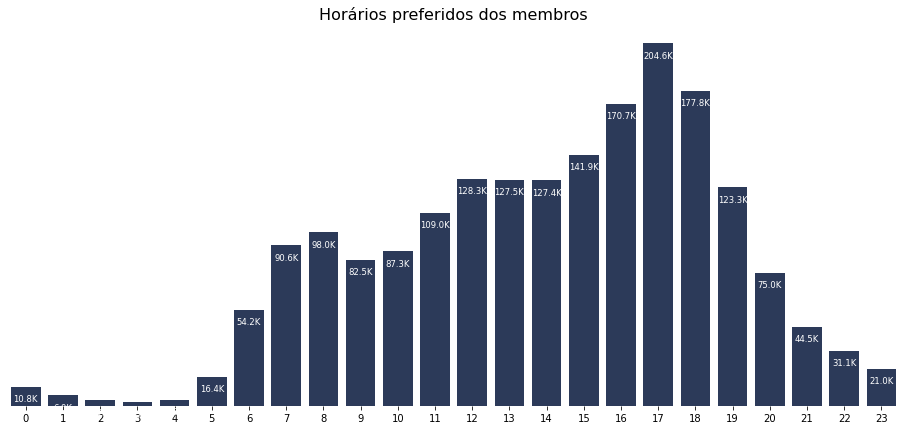

In [30]:
fig, ax = plt.subplots(figsize=(16,7))
sns.countplot(df[df['member_casual'] == 'member'].started_at.dt.hour, color='#253760', ax=ax)
ax.set_title('Horários preferidos dos membros', fontsize = 16)
ax.set_xlabel('');

for b in ax.patches:
        height_bar = b.get_height()
        ax.annotate(
                    f'{round(height_bar/1000, 1)}K',
                    xy=(b.get_x() + b.get_width()/2,  height_bar),
                    xytext=(0, -12),
                    textcoords="offset points",
                    va='center',
                    ha='center',
                    fontsize=8.5,
                    color='w'
                    )
plt.gca().axes.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Tipo casual

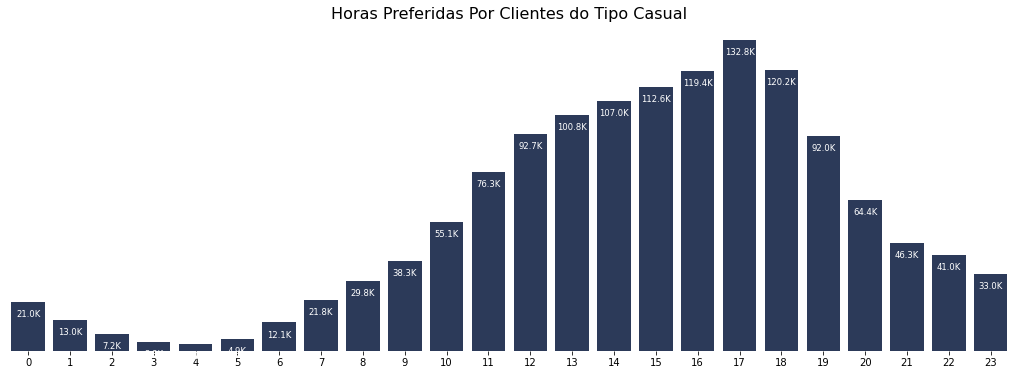

In [31]:
fig, ax = plt.subplots(figsize=(18,6))
sns.countplot(df[df['member_casual'] == 'casual'].started_at.dt.hour, color='#253760', ax=ax)
ax.set_title('Horas Preferidas Por Clientes do Tipo Casual', fontsize = 16)
ax.set_xlabel('');

for b in ax.patches:
        height_bar = b.get_height()
        ax.annotate(
                    f'{round(height_bar/1000, 1)}K',
                    xy=(b.get_x() + b.get_width()/2,  height_bar),
                    xytext=(0, -12),
                    textcoords="offset points",
                    va='center',
                    ha='center',
                    fontsize=8.5,
                    color='w'
                    )
plt.gca().axes.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#### Observações:

        - Clientes tipo member possuem uma clara preferência pelo horário de 16h às 18h
        - Clientes tipo casual tem preferência pela mesma faixa, mas é mais equilibrado com a tarde toda

### 5 - Dias da semana preferidos para utilização do serviço

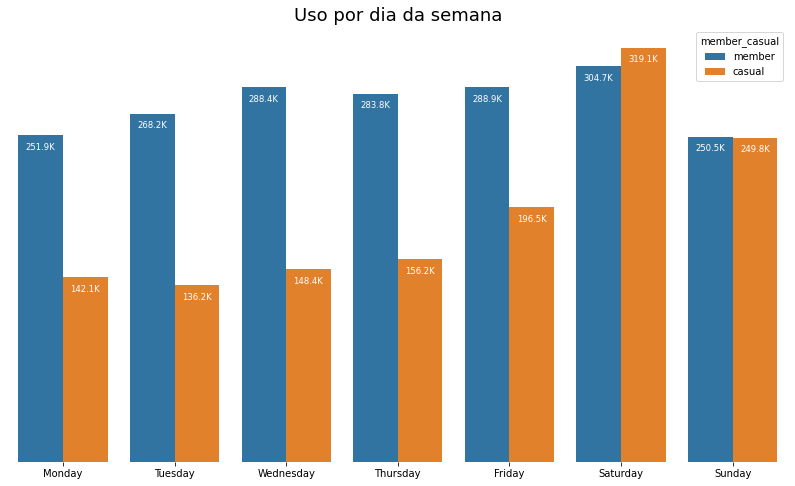

In [32]:
fig, ax = plt.subplots(figsize=(14,  8))
sns.countplot(x = df['day'], hue=df.member_casual, 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=ax)
plt.xlabel('')
plt.title('Uso por dia da semana', fontdict={'fontsize':18});

for b in ax.patches:
        height_bar = b.get_height()
        ax.annotate(
                    f'{round(height_bar/1000, 1)}K',
                    xy=(b.get_x() + b.get_width()/2,  height_bar),
                    xytext=(0, -12),
                    textcoords="offset points",
                    va='center',
                    ha='center',
                    fontsize=8.5,
                    color='w'
                    )
plt.gca().axes.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#### Observações:

Os clientes do tipo member usam o serviço mais regularmente e os clientes do tipo casual preferem o fim de semana
    

### 6 - Meses preferidos por tipo de cliente

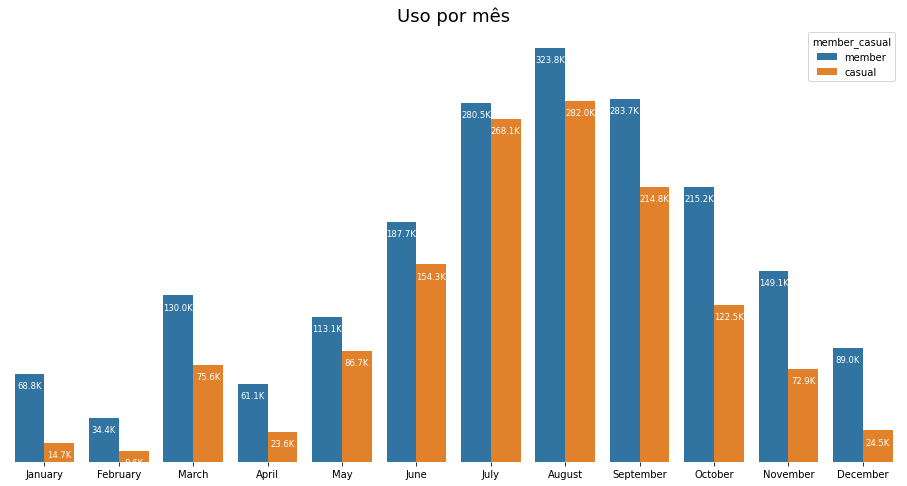

In [33]:
fig, ax = plt.subplots(figsize=(16,  8))
sns.countplot(x='month', hue='member_casual', data=df,
              order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ax=ax)
plt.xlabel('')
plt.title('Uso por mês', fontdict={'fontsize':18});

for b in ax.patches:
        height_bar = b.get_height()
        ax.annotate(
                    f'{round(height_bar/1000, 1)}K',
                    xy=(b.get_x() + b.get_width()/2,  height_bar),
                    xytext=(0, -12),
                    textcoords="offset points",
                    va='center',
                    ha='center',
                    fontsize=8.5,
                    color='w'
                    )
plt.gca().axes.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#### Observações:

Os clientes do tipo member tem um uso mais regular, mesmo que maior no meio do ano, já os do tipo casual tem uma preferência mais desbalanceada em favor dos meses de férias nos países do hemisfério norte 

### 7 - Stations preferidas por tipo de cliente

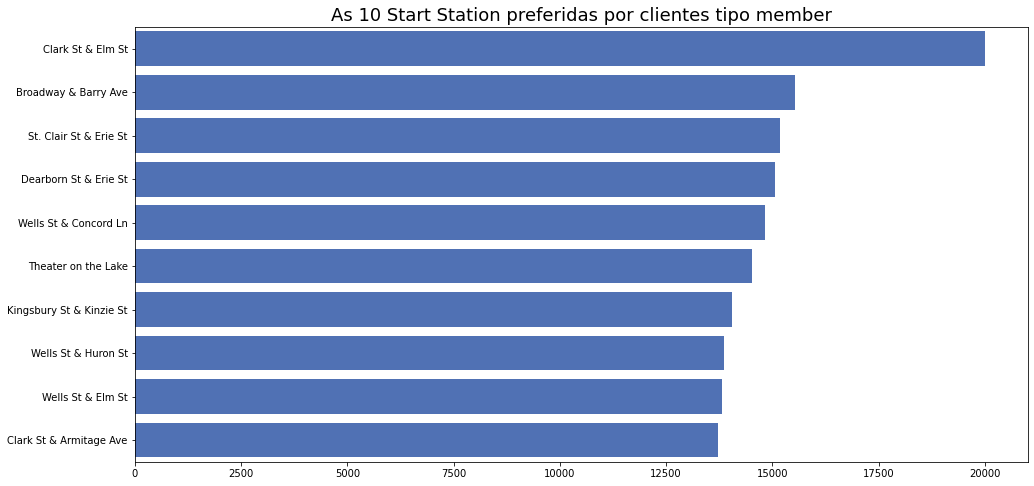

In [34]:
count = df[df['member_casual'] == 'member']['start_station_name'].value_counts()
count = count.head(10)

fig, ax = plt.subplots(figsize=(16,  8))
sns.barplot(y = count.index, x = count.values, color='#3f6bc5', ax=ax)
plt.title('As 10 Start Station preferidas por clientes tipo member', fontdict={'fontsize':18})
plt.xlabel('');

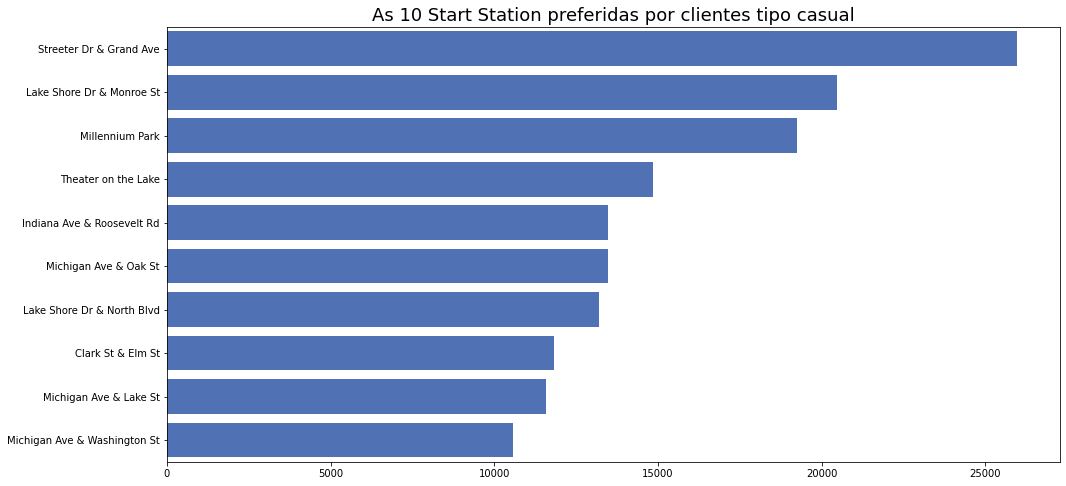

In [35]:
count = df[df['member_casual'] == 'casual']['start_station_name'].value_counts()
count = count.head(10)

fig, ax = plt.subplots(figsize=(16,  8))
sns.barplot(y = count.index, x = count.values, color='#3f6bc5', ax=ax)
plt.title('As 10 Start Station preferidas por clientes tipo casual', fontdict={'fontsize':18})
plt.xlabel('');

#### Observações:

A preferência para Stations é bastante dispersa, mas nos dois casos é possível ver que os clientes do tipo member e casual preferem a Clark St & Elm St e Street Dr & Grand Ave respectivamente

## Observações finais

### Dicas para análise futuras:

##### Disponibilização de informações sobre gênero, etnia e perfil socioeconômico dos clientes;
##### Pesquisa com os clientes tipo casual com o objetivo de identificar o que poderia ajudar eles a se tornarem clientes do tipo member

### Recomendações:

##### Criar campanhas de marketing nas Stations, horas, dias e períodos preferidas dos clientes do tipo casual;
##### Procurar incentivar o uso regular das atividades físicas com bicicletas, citando seu bem para a saúde;
##### Fazer uma nova análise com mais informações e segmentar os clientes que teriam o perfil para virar member e focalizar as ações de marketing para esses clientes, assim melhorando a eficiência na resolução do problema
        